# Feature selection in R

Variable and feature selection have become the focus of much research in areas of application for which datasets with tens or hundreds of thousands of variables are available. These areas include text processing of internet documents, gene expression array analysis, and combinatorial chemistry.

When you have dataset with thousands to millions of low level features, your main goal is to select the most relevant model to build better, faster, and easier to understand learning machines.

In this notebook we will use the `caret` R package. The `caret` package (short for Classification And REgression Training) is a set of functions that attempt to streamline the process for creating predictive models. The package contains tools for feature selection, data pre-processing, splitting, estimating the output, choosing the best model... And while there are many other implementations of different models, `caret` is one of the best.

The `caret` package is so popular because it provides uniform interface for setting the parameters, model training and prediction Read the [detailed documentation](http://topepo.github.io/caret/index.html) for more information. 

As for now, let's begin selecting features with R.

-------------------

Load the `caret` package:

In [69]:
library(caret)

`mlbench`: this package contains a collection of real-world and artificial machine learning benchmark problems. E.g.: datasets  from the UCI repository; functions for creating artificial datasets.

In [70]:
library(mlbench)

We will work with the `Soybean` dataset. It is a data frame with 683 observations on 36 variables. There are 35 categorical attributes, all numerical and a nominal denoting the class.

In [71]:
data(Soybean)

# Let's look at the variables...
head(Soybean[,-1])
# head(summary(Soybean[, -1]))

,date,plant.stand,precip,temp,hail,crop.hist,area.dam,sever,seed.tmt,germ,ellip.h,int.discolor,sclerotia,fruit.pods,fruit.spots,seed,mold.growth,seed.discolor,seed.size,shriveling,roots
1,6,0,2,1,0,1,1,1,0,0,<8b>,0,0,0,4,0,0,0,0,0,0
2,4,0,2,1,0,2,0,2,1,1,<8b>,0,0,0,4,0,0,0,0,0,0
3,3,0,2,1,0,1,0,2,1,2,<8b>,0,0,0,4,0,0,0,0,0,0
4,3,0,2,1,0,1,0,2,0,1,<8b>,0,0,0,4,0,0,0,0,0,0
5,6,0,2,1,0,2,0,1,0,2,<8b>,0,0,0,4,0,0,0,0,0,0
6,5,0,2,1,0,3,0,1,0,1,<8b>,0,0,0,4,0,0,0,0,0,0


In [72]:
# ...and at the target.
summary(Soybean[, 1])

2-4-d-injury         alternarialeaf-spot 
                         16                          91 
                anthracnose            bacterial-blight 
                         44                          20 
          bacterial-pustule                  brown-spot 
                         20                          92 
             brown-stem-rot                charcoal-rot 
                         44                          20 
              cyst-nematode diaporthe-pod-&-stem-blight 
                         14                          15 
      diaporthe-stem-canker                downy-mildew 
                         20                          20 
         frog-eye-leaf-spot            herbicide-injury 
                         91                           8 
     phyllosticta-leaf-spot            phytophthora-rot 
                         20                          88 
             powdery-mildew           purple-seed-stain 
                         20                          20 
       rhizoctonia-root-rot 
                         20

In [97]:
data(PimaIndiansDiabetes)
head(PimaIndiansDiabetes)
dim(PimaIndiansDiabetes)
summary(PimaIndiansDiabetes)

,pregnant,glucose,pressure,triceps,insulin,mass,pedigree,age,diabetes
1,6,148,72,35,0,33.6,0.627,50,pos
2,1,85,66,29,0,26.6,0.351,31,neg
3,8,183,64,0,0,23.3,0.672,32,pos
4,1,89,66,23,94,28.1,0.167,21,neg
5,0,137,40,35,168,43.1,2.288,33,pos
6,5,116,74,0,0,25.6,0.201,30,neg


[1] 768   9

    pregnant         glucose         pressure         triceps     
 Min.   : 0.000   Min.   :  0.0   Min.   :  0.00   Min.   : 0.00  
 1st Qu.: 1.000   1st Qu.: 99.0   1st Qu.: 62.00   1st Qu.: 0.00  
 Median : 3.000   Median :117.0   Median : 72.00   Median :23.00  
 Mean   : 3.845   Mean   :120.9   Mean   : 69.11   Mean   :20.54  
 3rd Qu.: 6.000   3rd Qu.:140.2   3rd Qu.: 80.00   3rd Qu.:32.00  
 Max.   :17.000   Max.   :199.0   Max.   :122.00   Max.   :99.00  
    insulin           mass          pedigree           age        diabetes 
 Min.   :  0.0   Min.   : 0.00   Min.   :0.0780   Min.   :21.00   neg:500  
 1st Qu.:  0.0   1st Qu.:27.30   1st Qu.:0.2437   1st Qu.:24.00   pos:268  
 Median : 30.5   Median :32.00   Median :0.3725   Median :29.00            
 Mean   : 79.8   Mean   :31.99   Mean   :0.4719   Mean   :33.24            
 3rd Qu.:127.2   3rd Qu.:36.60   3rd Qu.:0.6262   3rd Qu.:41.00            
 Max.   :846.0   Max.   :67.10   Max.   :2.4200   Max.   :81.00            

## Determine highly correlated variables

Oh, by the way, if you know how Lasso regression works, you already know at least one feature selection algorithm. Just in case – a quick reminder: if there are strongly correlated variables in your dataset, results of regression can be unexpected, false, even bizarre. In particularly, these correlated variables will get huge weights. Lasso (L1) regression sets one in a pair of such weights equal to 0.

In [74]:
# m

To remove duplicates or highly correlled attributes we will use `findCorrelation` method from the `caret` dataset. This function returns a list of 

In [105]:
cor.matrix <- cor(PimaIndiansDiabetes[, 1:8])
# dim(cor.matrix)
cor.matrix

# FindCorrelation returns a list.
covas <- findCorrelation(cor.matrix, cutoff = 0.38, verbose = T)


strong.correlation.matrix <- findCorrelation(cor.matrix, cutoff = 0.38, verbose = T)
strong.correlation.matrix

,pregnant,glucose,pressure,triceps,insulin,mass,pedigree,age
pregnant,1.00000000,0.12945867,0.14128198,-0.08167177,-0.07353461,0.01768309,-0.03352267,0.54434123
glucose,0.12945867,1.00000000,0.15258959,0.05732789,0.33135711,0.22107107,0.13733730,0.26351432
pressure,0.14128198,0.15258959,1.00000000,0.20737054,0.08893338,0.28180529,0.04126495,0.23952795
triceps,-0.08167177,0.05732789,0.20737054,1.00000000,0.43678257,0.39257320,0.18392757,-0.11397026
insulin,-0.07353461,0.33135711,0.08893338,0.43678257,1.00000000,0.19785906,0.18507093,-0.04216295
mass,0.01768309,0.22107107,0.28180529,0.39257320,0.19785906,1.00000000,0.14064695,0.03624187
pedigree,-0.03352267,0.13733730,0.04126495,0.18392757,0.18507093,0.14064695,1.00000000,0.03356131
age,0.54434123,0.26351432,0.23952795,-0.11397026,-0.04216295,0.03624187,0.03356131,1.00000000


Compare row 4  and column  5 with corr  0.437 
  Means:  0.211 vs 0.169 so flagging column 4 
Compare row 8  and column  1 with corr  0.544 
  Means:  0.193 vs 0.159 so flagging column 8 
All correlations <= 0.38 
 int [1:2] 4 8
NULL
Compare row 4  and column  5 with corr  0.437 
  Means:  0.211 vs 0.169 so flagging column 4 
Compare row 8  and column  1 with corr  0.544 
  Means:  0.193 vs 0.159 so flagging column 8 
All correlations <= 0.38 


[1] 4 8

## Variable Importance

The `train` function is one of the most important and basic functions here. It is responsible for building and evaluating the model. This is how `train` works:
1. 

`trainControl` generates parameters that further control how are models are created. Every step of this process is customizable, and i

In [79]:
# > Resampling: Cross-Validated (10 fold, repeated 3 times)
# Here we create cross-validator (method = "repeatedcv")

control <- trainControl(method = "repeatedcv", number = 10, repeats = 3)

In [80]:
# Train the model
# diabetes – target (y)
# everything else – data (X)
# method = "lqv":
# learning vector quantization (LVQ) – is a prototype-based supervised classification algorithm

model <- train(diabetes ~ ., data = PimaIndiansDiabetes, method = "lvq",
               preProcess = "scale", trControl = control)

In [81]:
model

Learning Vector Quantization 

768 samples
  8 predictor
  2 classes: 'neg', 'pos' 

Pre-processing: scaled (8) 
Resampling: Cross-Validated (10 fold, repeated 3 times) 
Summary of sample sizes: 691, 691, 691, 691, 691, 692, ... 
Resampling results across tuning parameters:

  size  k   Accuracy   Kappa    
  4      1  0.7062941  0.2667642
  4      6  0.7031784  0.2529886
  4     11  0.7044714  0.2696643
  6      1  0.7235931  0.3410629
  6      6  0.7304910  0.3594600
  6     11  0.7235190  0.3444498
  8      1  0.7361187  0.3888529
  8      6  0.7296992  0.3803066
  8     11  0.7205058  0.3413930

Accuracy was used to select the optimal model using  the largest value.
The final values used for the model were size = 8 and k = 1. 

In [82]:
# ?varImp

ROC curve variable importance

         Importance
glucose      0.7881
mass         0.6876
age          0.6869
pregnant     0.6195
pedigree     0.6062
pressure     0.5865
triceps      0.5536
insulin      0.4621


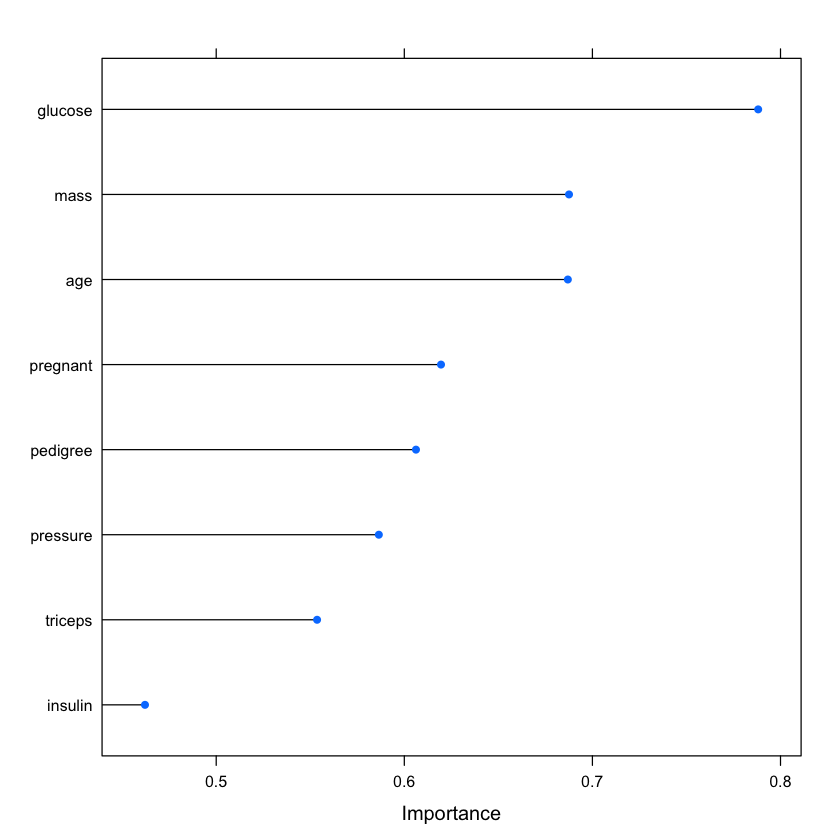

In [83]:
# > varImp – A generic method for calculating variable importance 
# for objects produced by train and method specific methods
# Here we calculate the variable importance

vars.importance <- varImp(model, scale = F)

print(vars.importance)
plot(vars.importance)

## Recursive Feature Elimination

Here's our Recursive Feature Elimination (RFE) algorithm:

![](http://topepo.github.io/caret/Algo2.png)

It's slightly different from the basic version of RFE because, as you can see, our RFE **incorporates resampling**. 

Since feature selection is part of the model building process, resampling methods (e.g. cross-validation, the bootstrap) should factor in the variability caused by feature selection when calculating performance. To get performance estimates that incorporate the variation due to feature selection, it is suggested that the steps in the basic algorithm be **encapsulated inside an outer layer of resampling**. Here we will run **cross-validation** (again) with 25 folds.

RFE with resampling is more computationally burdensome, but it can be easily parallelized (if your machine has multiple processors).

In `caret`, our resampling-based algorithm is presented by function `rfe`. 

> `rfeIter` is the basic algorithm while `rfe` wraps these operations inside of resampling. To avoid selection bias, it is better to use the function `rfe` than `rfeIter`.

`rfeControl` generates a control object that can be used to specify the details of the feature selection algorithms used in this package:

* `functions = rfFuncs` – a list of functions for model fitting, prediction and variable importance (random forests),
* `method = "cv"` – the external resampling method (cross-validation),
* `number` – either the number of folds or number of resampling iterations (25 folds).

Let's create the control object `rfe.ctrl`:

In [84]:
rfe.ctrl <- rfeControl(functions = rfFuncs, method = "cv", number = 25, verbose = FALSE)

And next, we'll run the RFE algorithm!

`rfe` takes `X` (predictor variables),

In [85]:
result <- rfe(PimaIndiansDiabetes[, 1:8], PimaIndiansDiabetes[, 9], 
              sizes = c(1:8), rfeControl = rfe.ctrl)

# Show the result!
result


Recursive feature selection

Outer resampling method: Cross-Validated (25 fold) 

Resampling performance over subset size:

 Variables Accuracy  Kappa AccuracySD KappaSD Selected
         1   0.6929 0.2843    0.06827  0.1609         
         2   0.7438 0.4208    0.07235  0.1601         
         3   0.7554 0.4493    0.07355  0.1599         
         4   0.7630 0.4668    0.06873  0.1523        *
         5   0.7563 0.4502    0.07306  0.1642         
         6   0.7565 0.4459    0.05597  0.1260         
         7   0.7474 0.4275    0.06185  0.1377         
         8   0.7617 0.4612    0.06848  0.1488         

The top 4 variables (out of 4):
   glucose, mass, age, pregnant


`predictors()` – this function gets **names of the selected variables** (selected by the final model, I mean).

**The final model** itself is `rfe`'s object `fit` and can be used for making predictions. In our case, it is a random forest classifier:
> `Type of random forest: classification`

And, finally, how good is our model? To answer this question, let's plot the results of cross-validation. The best subset size and resampling performance for this size are saved into `optsize` and `resample` objects respectively.

There's a convenient way to visualize performance `plot()` – a function that easily plots resampling accuracy over subset size. 

In [86]:
predictors(result)

[1] "glucose"  "mass"     "age"      "pregnant"

In [87]:
# The final model
result$fit


Call:
 randomForest(x = x, y = y, importance = first) 
               Type of random forest: classification
                     Number of trees: 500
No. of variables tried at each split: 2

        OOB estimate of  error rate: 24.35%
Confusion matrix:
    neg pos class.error
neg 415  85    0.170000
pos 102 166    0.380597

In [88]:
# Get selected subset size
result$optsize

[1] 4

In [89]:
# First 6 rows of resampling results
head(result$resample)

,Variables,Accuracy,Kappa,.cell1,.cell2,.cell3,.cell4,Resample
4,4,0.9032258,0.7748184,20,0,3,8,Fold01
12,4,0.7333333,0.3684211,17,3,5,5,Fold02
20,4,0.7333333,0.4,16,4,4,6,Fold03
28,4,0.8709677,0.7061611,19,1,3,8,Fold04
36,4,0.7741935,0.4745763,18,2,5,6,Fold05
44,4,0.8064516,0.5772727,17,3,3,8,Fold06


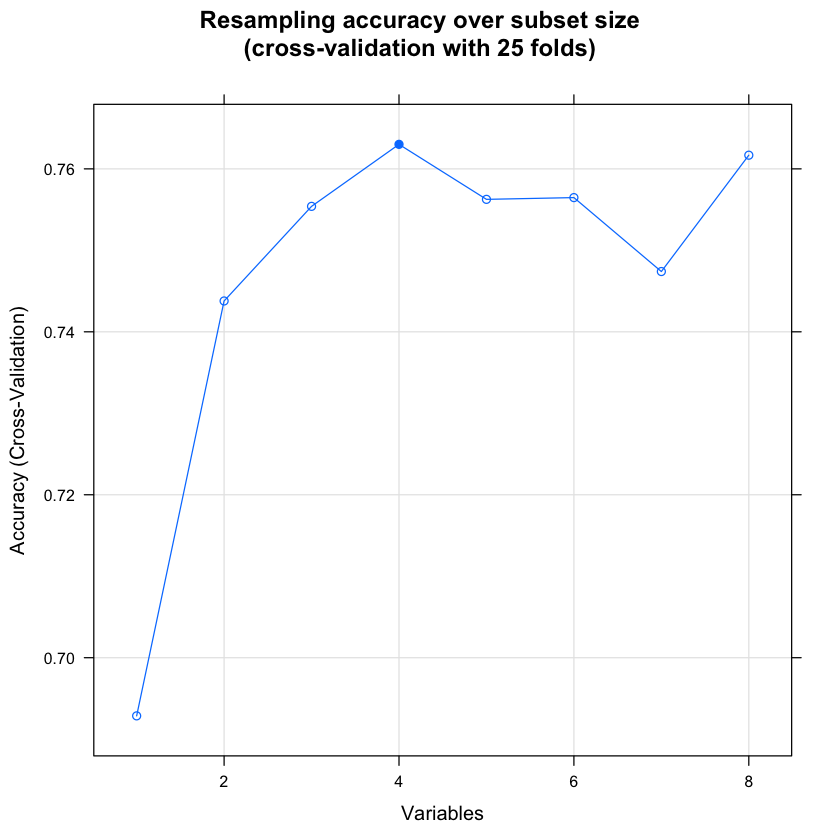

In [90]:
# Let's compare the digits with the picture
plot(result, type = c("g", "o"), 
     main = "Resampling accuracy over subset size\n(cross-validation with 25 folds)")